<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/22%20-%20Sklearn%20Pre-processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22/30 Sklearn : Pre-processing

## 1. Encodage

### Encodage LabelEncoder et LabelBinarizer

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

In [39]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [33]:
# # Encode chaque de la variable y en OneHot
# y = np.array(['chat', 'chien', 'chat', 'oiseau'])

# encoder = LabelBinarizer(sparse_output=True)
# encoder.fit_transform(y)

In [41]:
encoder.inverse_transform(np.array([0, 0, 2]))

array(['chat', 'chat', 'oiseau'], dtype='<U6')

In [42]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

### Encodage Ordinal et Encodage OneHot

In [43]:
# Encode les categories de la variable X en OneHot
X = np.array([['chat', 'poils'],
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [45]:
encoder = OneHotEncoder(sparse_=False)
encoder.fit_transform(X)

NameError: name 'sparse_output' is not defined

## 2. Normalisation

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

### MinMaxScaler

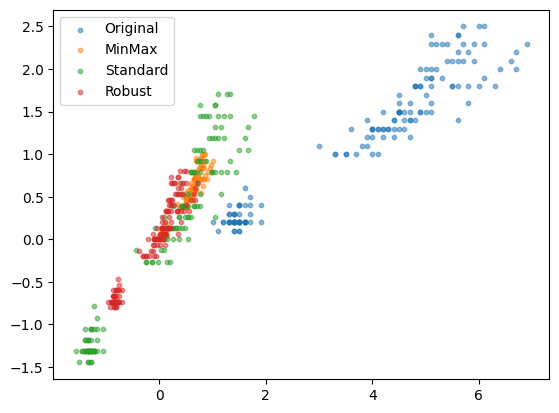

In [56]:
X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha=0.5, s=10)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], alpha=0.5, s=10)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], alpha=0.5, s=10)
plt.scatter(X_robust[:, 2], X_robust[:, 3], alpha=0.5, s=10)
plt.legend(['Original', 'MinMax', 'Standard', 'Robust'])

### StandardScaler

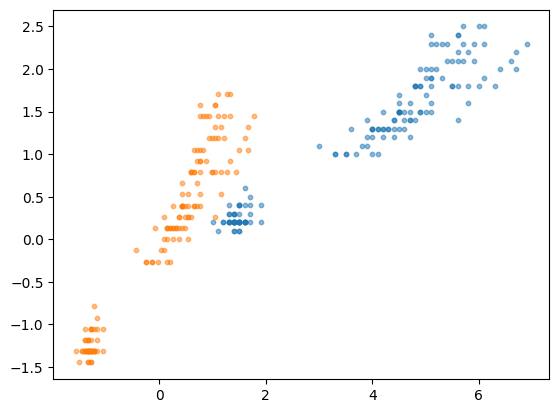

In [51]:
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha=0.5, s=10)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], s=10, alpha=0.5)

### RobustScaler

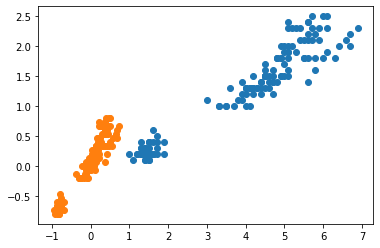

In [ ]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3])

# 3. Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

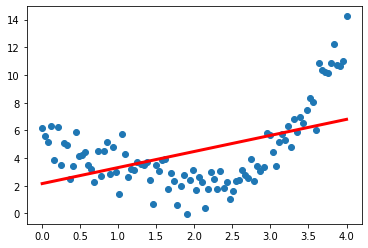

In [ ]:
m = 100
X = np.linspace(0, 4, m).reshape((m, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(m, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

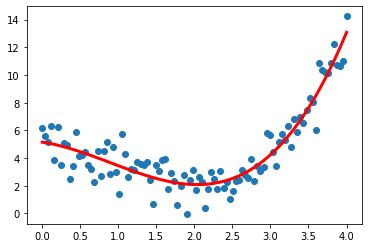

In [ ]:
X_poly = PolynomialFeatures(3).fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

# 4. Discretisation

In [ ]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [ ]:
X = np.linspace(0, 5, 10).reshape((10, 1))

In [ ]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [ ]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# 5. Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('sgdclassifier',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                     

In [ ]:
grid.score(X_test, y_test)

0.9736842105263158